In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, PercentFormatter
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

In [2]:
all_transactions = pd.read_parquet('../../../data/transactions_train.parquet')
articles = pd.read_parquet('../../../data/articles.parquet')
customers = pd.read_parquet('../../../data/customers.parquet')

In [5]:
# Join every product with customer age on customer_id
aged_transactions = all_transactions.merge(customers[['customer_id', 'age']], on='customer_id', how='left')
aged_transactions

,t_dat,customer_id,article_id,price,sales_channel_id,week,age
0,2018-09-20,1728846800780188,519773001,0.028458,2,0,59
1,2018-09-20,1728846800780188,578472001,0.032525,2,0,59
2,2018-09-20,2076973761519164,661795002,0.167797,2,0,55
3,2018-09-20,2076973761519164,684080003,0.101678,2,0,55
4,2018-09-20,2918879973994241,662980001,0.033881,1,0,40
...,...,...,...,...,...,...,...
31788319,2020-09-22,18439937050817258297,891591003,0.084729,2,104,49
31788320,2020-09-22,18439937050817258297,869706005,0.084729,2,104,49
31788321,2020-09-22,18440902715633436014,918894002,0.016932,1,104,18
31788322,2020-09-22,18440902715633436014,761269001,0.016932,1,104,18


/tmp/ipykernel_403/786708501.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(customers['age'], kde=False)


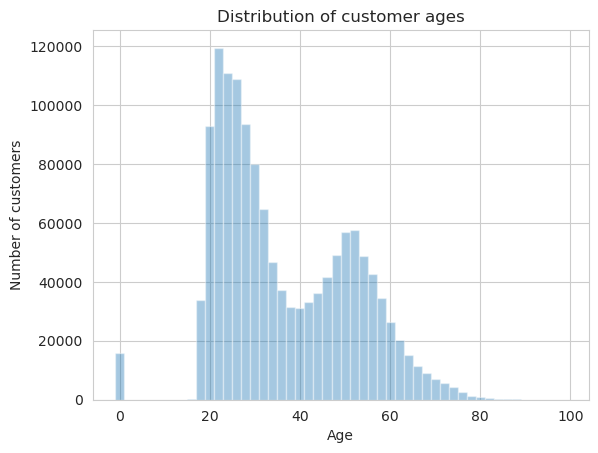

In [29]:
# Plot the distribution of customer ages using customers dataset
ax = sns.distplot(customers['age'], kde=False)
ax.set_title('Distribution of customer ages')
ax.set_xlabel('Age')
ax.set_ylabel('Number of customers')
plt.show()

In [30]:
# Put the ages into 10 year intervals, with -1 separate as unknown
aged_transactions['age'] = aged_transactions['age'].apply(lambda x: int(x / 10) * 10 if x != -1 else -1)

In [31]:
# Visualise the distribution of customer ages for random article using stacked bar chart
def plot_article(article_id):     
    article_transactions = aged_transactions[aged_transactions['article_id'] == article_id]

    # Get the age distribution of customers who bought the article
    age_distribution = article_transactions.groupby('age').size().reset_index(name='counts')
    age_distribution['counts'] = age_distribution['counts'] / age_distribution['counts'].sum()       
    
    # Plot the distribution
    ax = sns.barplot(x='age', y='counts', data=age_distribution)
    ax.set_title(f'Age distribution of customers who bought article {article_id}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Proportion of customers')
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()

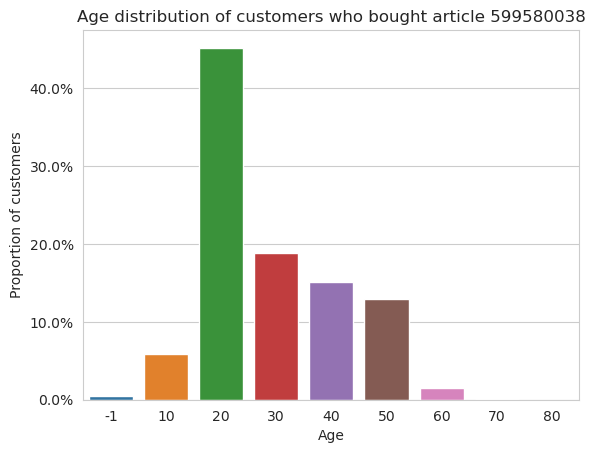

In [32]:
# Select random article with at least 10000 transactions
article_id = all_transactions['article_id'].value_counts()[all_transactions['article_id'].value_counts() > 10000].sample(1).index[0]
plot_article(article_id)

In [33]:
# List the top 12 most sold articles for each age group
top_articles = aged_transactions.groupby(['age', 'article_id']).size().reset_index(name='counts')
top_articles = top_articles.sort_values(['age', 'counts'], ascending=[True, False])
top_articles = top_articles.groupby('age').head(12)
top_articles

,age,article_id,counts
19439,-1,706016001,231
19440,-1,706016002,176
780,-1,372860001,159
7479,-1,610776002,152
116,-1,189634001,150
...,...,...,...
572934,90,833021002,6
571857,90,399223028,5
571858,90,399223029,5
572553,90,738943003,5


In [40]:
# Get articles that appear in the top 12 for multiple age groups
inter_top_articles = top_articles.groupby('article_id').size().reset_index(name='counts')
inter_top_articles

,article_id,counts
0,156231001,2
1,158340001,1
2,160442007,1
3,189634001,1
4,351484002,2
5,372860001,6
6,372860002,5
7,399223001,2
8,399223028,1
9,399223029,1
